# S&D1: Assignment 1
## Deadline: January 14 (until 14:00)
## This is an individual or a group assignment (max 2 students). You are allowed to use any previously written source for your research on the topic. However, any source other than the textbook and the class notes should be cited and the bibliographic information should be given.


**Instructions:** All answers should be filled in the notebook and then submitted.
Name of notebook should be in following format:
 - Laurs_Shamykhanova_BDA_2106_Assignment1.ipynb

## Q1 (30%)
Read video games sales data from vgsales.csv file. This dataset contains a list of video games with sales greater than 100,000 copies. Fields include:
* Rank - Ranking of overall sales
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.

**Tasks to do:**
1. Using the Matplotlib library build histograms and boxplots for NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales? 
2. What is the average sales for each region? 
3. What is the standard deviation for each region?
4. How many outliers (using IQR rule) we have in Global_Sales column?
5. What is the difference between mean and median values in Global_Sales column? 
6. Remove outliers and plot histogram and boxplot again. 
7. What is the difference between mean and median now?
8. In your opinion what happened, why difference between mean and median have changed?

*Hint: use pandas to read dataset.*

In [3]:
# Please, write your code herimport pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('vgsales.csv')
sales_by_region = df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]

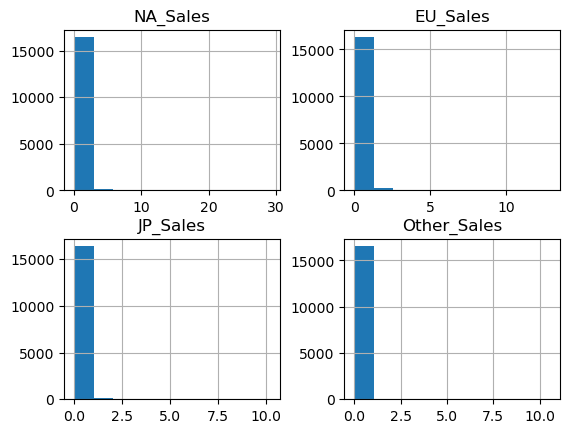

In [25]:
#Q1.1
sales_by_region.tail(-1).hist()
plt.show()

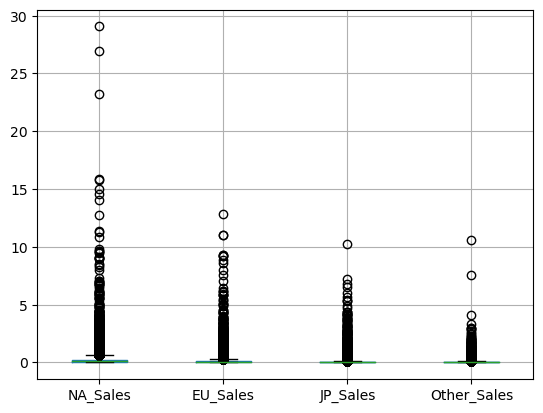

In [27]:
#Q1.1.1 
sales_by_region.tail(-1).boxplot() 
plt.show()

In [28]:
# Q1.2
sales_by_region = sales_by_region.mean()

sales_by_region

NA_Sales       0.264667
EU_Sales       0.146652
JP_Sales       0.077782
Other_Sales    0.048063
dtype: float64

In [38]:
# Q1.3
print('NA_Sales std is ',df['NA_Sales'].std())
print('EU_Sales std is ',df['EU_Sales'].std())
print('JP_Sales std is ',df['JP_Sales'].std() )
print('Other_Sales std is ',df['Other_Sales'].std())

NA_Sales std is  0.8166830292990428
EU_Sales std is  0.5053512312869366
JP_Sales std is  0.30929064808213236
Other_Sales std is  0.18858840291278392


In [39]:
#Q1.4
Q1 = df['Global_Sales'].quantile(0.25)
Q3 = df['Global_Sales'].quantile(0.75)

IQR = Q3 - Q1

upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)

new_df = df.copy()
new_df.loc[(new_df['Global_Sales'] > upper), 'Global_Sales'] = upper
new_df.loc[(new_df['Global_Sales'] < lower), 'Global_Sales'] = lower

new_df = df.loc[(df['Global_Sales'] < upper) & (df['Global_Sales'] > lower)]
print(len(df['Global_Sales']))
print(len(new_df['Global_Sales']))
print( len(df['Global_Sales']) - len(new_df['Global_Sales']))

16598
14705
1893


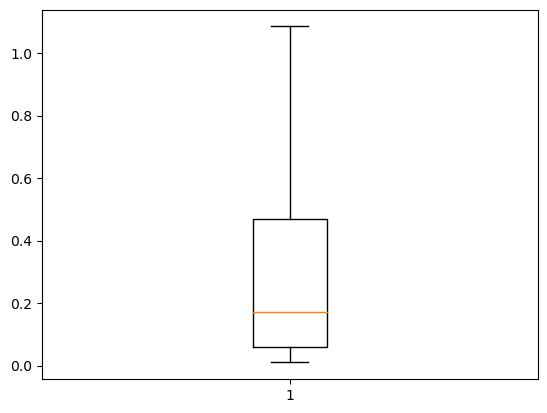

In [40]:
#Q1.6
Q1 = df['Global_Sales'].quantile(0.25)
Q3 = df['Global_Sales'].quantile(0.75)

IQR = Q3 - Q1

upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)

new_df = df.loc[(df['Global_Sales'] < upper) & (df['Global_Sales'] > lower)]

new_df = df.copy()
new_df.loc[(new_df['Global_Sales'] > upper), 'Global_Sales'] = upper
new_df.loc[(new_df['Global_Sales'] < lower), 'Global_Sales'] = lower

plt.boxplot(new_df['Global_Sales'])
plt.show()

Q1.5
The mean (average) of a data set is found by adding all numbers in the data set and then dividing by the number of values in the set.
The median is the middle value when a data set is ordered from least to greatest.

In [41]:
#Q1.5
print(df['Global_Sales'].mean())

print(df['Global_Sales'].median())


0.53744065550074
0.17


#Q1.7 and Q1.8
we removed the outliers, and big numbers were deleted, mean and median became smaller
At the beginning of our average value was 0.53744065550074, after we removed the outliers, our average value was converted to 0.08587278106508205. From this we can conclude that outliers can distort the meaning of numerical data. The larger the outlier, the more difficult it is to determine the true mean
The same thing happened with the median
Due to the fact that we removed the outliers, the difference between the average and the median has subsequently changed. If with outliers, the difference between the mean and median was 0.36744065550074, after 0.015872781065082050


In [42]:
#Q1.7
print(new_df['Global_Sales'].mean())

print(new_df['Global_Sales'].median())

0.3288188335944446
0.17


## Q2 (20%)
We have a sample data about GPA for two groups of students (software engineers and big data analytics), which are presented in the lists below. Based on these data, do the following:
1. Construct 95% confidence interval for the population mean of software engineer students' GPA. State all the assumptions. 
2. Is there an evidence that average GPA for this group is larger than 2.9?
3. Construct 95% confidence interval for difference between two population means of GPA. State all the assumptions. 
4. Is there an evidence that one group has higher average GPA than another? If yes, which group performs better?
5. How your analysis would change in Task 1, if the sample size was 30? What if 20? Explain.

*Note: do not use too many cells for one task. For theoretical question use markdown cells.*

In [3]:
gpa_se = [3.54, 3.17, 2.68, 3.08, 3.43, 3.11, 3.33, 2.70, 3.29, 3.94, 3.50, 3.07, 3.05,
          3.33, 3.37, 3.25, 2.90, 3.05, 3.55, 2.63, 3.03, 2.94, 2.80, 3.05, 2.91, 3.22,
          3.21, 3.09, 3.09, 3.06, 3.29, 3.12, 2.90, 3.42, 3.47, 2.99, 3.35, 2.94, 3.03,
          2.71, 3.09, 3.51, 3.73, 2.92, 3.47, 3.14, 3.19, 3.23, 2.35, 3.06, 3.71, 3.44]

In [4]:
gpa_bda = [3.16, 3.40, 3.61, 3.37, 3.24, 3.40, 3.00, 2.78, 3.22, 3.43, 3.32, 3.58,
           3.46, 3.45, 3.52, 3.13, 3.13, 3.81, 3.22, 3.65, 2.65, 3.51, 3.94, 3.86,
           3.30, 3.31, 3.45, 3.17, 3.57, 3.90, 3.54, 3.41, 3.39, 3.99, 3.24, 3.50,
           3.44, 3.55, 3.40, 3.17, 3.18, 3.67, 3.64, 3.29, 3.32, 3.19, 2.71, 3.79,
           3.12, 3.32, 3.17, 3.38, 3.76, 3.19, 3.47, 3.41, 3.01, 3.47, 2.72, 3.16]

In [43]:
# Please, write your code here
#Q2.1
import numpy

se = [3.54, 3.17, 2.68, 3.08, 3.43, 3.11, 3.33, 2.70, 3.29, 3.94, 3.50, 3.07, 3.05,
          3.33, 3.37, 3.25, 2.90, 3.05, 3.55, 2.63, 3.03, 2.94, 2.80, 3.05, 2.91, 3.22,
          3.21, 3.09, 3.09, 3.06, 3.29, 3.12, 2.90, 3.42, 3.47, 2.99, 3.35, 2.94, 3.03,
          2.71, 3.09, 3.51, 3.73, 2.92, 3.47, 3.14, 3.19, 3.23, 2.35, 3.06, 3.71, 3.44]

x = numpy.std(se)

print(x)

0.2970711941247388


In [44]:
#Q2.2
import statistics

bda = [3.16, 3.40, 3.61, 3.37, 3.24, 3.40, 3.00, 2.78, 3.22, 3.43, 3.32, 3.58,
           3.46, 3.45, 3.52, 3.13, 3.13, 3.81, 3.22, 3.65, 2.65, 3.51, 3.94, 3.86,
           3.30, 3.31, 3.45, 3.17, 3.57, 3.90, 3.54, 3.41, 3.39, 3.99, 3.24, 3.50,
           3.44, 3.55, 3.40, 3.17, 3.18, 3.67, 3.64, 3.29, 3.32, 3.19, 2.71, 3.79,
           3.12, 3.32, 3.17, 3.38, 3.76, 3.19, 3.47, 3.41, 3.01, 3.47, 2.72, 3.16]

average = statistics.mean(bda)

print("Average of List:", average)


Average of List: 3.369


In [45]:
#Q2.3
import numpy as np
import scipy.stats as st

data = [3.54, 3.17, 2.68, 3.08, 3.43, 3.11, 3.33, 2.70, 3.29, 3.94, 3.50, 3.07, 3.05,
          3.33, 3.37, 3.25, 2.90, 3.05, 3.55, 2.63, 3.03, 2.94, 2.80, 3.05, 2.91, 3.22,
          3.21, 3.09, 3.09, 3.06, 3.29, 3.12, 2.90, 3.42, 3.47, 2.99, 3.35, 2.94, 3.03,
          2.71, 3.09, 3.51, 3.73, 2.92, 3.47, 3.14, 3.19, 3.23, 2.35, 3.06, 3.71, 3.44]

st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))



/var/folders/gr/v6b2jn_94wz35vvmds6lbllh0000gn/T/ipykernel_36962/4033979530.py:10: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data))


(3.0786033375117774, 3.2456274317189924)

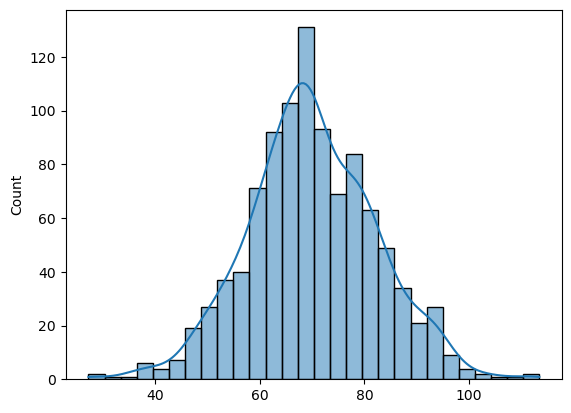

array([87.9336871 , 78.90026124, 68.53533665, 92.93559019, 69.08220939,
       71.83830624, 74.68142621, 63.19385832, 64.76495737, 67.56921138,
       81.37704929, 69.92241066, 66.25008617, 68.12231081, 65.03741596,
       51.79442182, 53.22541388, 63.19402789, 55.7172016 , 75.57406216,
       85.15356814, 68.34102665, 72.73775531])

In [46]:
#Q2.4
from numpy.random import normal
import matplotlib.pyplot as plt
import seaborn as sns

norm = normal(loc=70, scale=12, size=1000)
sns.histplot(norm, kde=True)

plt.show()


# In[27]:


from scipy import stats
from scipy.optimize import minimize
# generate a norm data with 0 mean and 1 variance
data = stats.norm.rvs(loc= 70,scale = 12,size = 1000)
data[0:23]


In [ ]:
#Q2.5
#WOULD change median, mean and other statistic tools
#as the sample size increases, the variability of sampling distribution decreases.

## Q3 (10%)
Consider the set of data below (my_list). Does it appear to approximately follow a normal distribution? Justify your answer.

*Hint: Check for the properties of the Normal distribution and for the graph of distribtuion.*

In [48]:
my_list = [113, 71, 89, 143, 140, 146, 122, 104, 134, 143, 110, 131, 125, 116, 
           164, 107, 113, 122, 119, 116, 98, 161, 128, 152, 116, 83, 86, 155,
           128, 122, 95, 122, 131, 134, 107, 113, 101, 92, 134, 140]

120.65
122.0


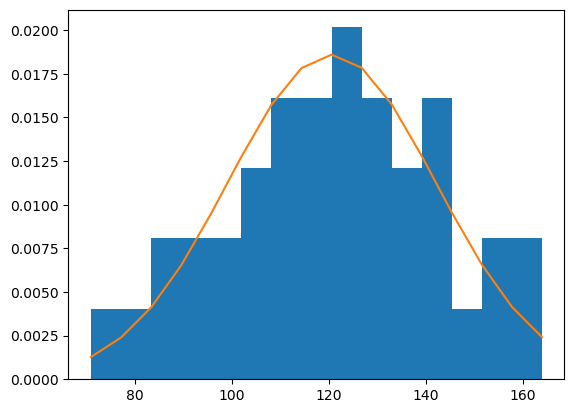

In [49]:
#Помогала Сабина из bda-2106
# It is normal distribution. Because,\

# Firstly, Graph has a symmetric bell shape
# Secondly, The mean and median are similar
mean = np.mean(my_list)
median = np.median(my_list)
std = np.std(my_list)

print(mean) #121
print(median)#122


count, bins, ignored = plt.hist(my_list,15,density = True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mean)**2 / (2 * std **2)))
plt.show()



In [ ]:
yes, data is a normal distribution
Firstly, Graph has a symmetric bell shape
Secondly, The mean and median are similar and lay in middle
Thirdly, complies with the Emperial rule:
    1.μ±σ includes approximately 68% of the observations
    2.μ±2*σ includes approximately 95% of the observations
    3.μ±3*σ includes almost all of the observations (99.7% to be more precise)

## Q4 (10%)
Generate synthetic data (numpy.random.normal) with mean = 70, std = 12 and size = 1000 (round it to nearest integer). 

__Tasks to do:__
1. Plot histogram
2. What is the mean, median and mode
3. Build function to calculate standard deviation using standard Python functionality
4. Calculate std. using your function and compare it with numpy function

In [8]:
# Please, write your code hfrom numpy.random import normal
# What we ourselves identified and decided is the same as the original and with the solution with numpy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy import stats
from numpy.random import normal

import numpy as np

norm = normal(loc=70, scale=12, size=1000)
sns.histplot(norm, kde=True)

plt.show()


# generate a norm data with 0 mean and 1 variance
data = stats.norm.rvs(loc= 70,scale = 12,size = 1000)
data[0:23]



In [55]:
import statistics

norm = [80.88070798, 82.47509398, 58.77973773, 75.61567983, 65.78926625,
       60.42009495, 74.5553031 , 62.75302949, 77.46361168, 76.60886114,
       60.79211406, 60.43604601, 79.73288879, 65.80397129, 63.40338043,
       94.16973098, 73.62513401, 52.64654234, 96.44944038, 59.96023978,
       46.22909537, 75.40602359, 69.38754009]

average = statistics.mean(norm)

print("Average of List:", average)


Average of List: 70.14711014130435


In [56]:
# In[29]:


speed = [80.88070798, 82.47509398, 58.77973773, 75.61567983, 65.78926625,
       60.42009495, 74.5553031 , 62.75302949, 77.46361168, 76.60886114,
       60.79211406, 60.43604601, 79.73288879, 65.80397129, 63.40338043,
       94.16973098, 73.62513401, 52.64654234, 96.44944038, 59.96023978,
       46.22909537, 75.40602359, 69.38754009]

x = np.median(speed)

print(x)




69.38754009


In [58]:
speed = [80.88070798, 82.47509398, 58.77973773, 75.61567983, 65.78926625,
       60.42009495, 74.5553031 , 62.75302949, 77.46361168, 76.60886114,
       60.79211406, 60.43604601, 79.73288879, 65.80397129, 63.40338043,
       94.16973098, 73.62513401, 52.64654234, 96.44944038, 59.96023978,
       46.22909537, 75.40602359, 69.38754009]

x = stats.mode(speed)

print(x)


ModeResult(mode=array([46.22909537]), count=array([1]))


/var/folders/gr/v6b2jn_94wz35vvmds6lbllh0000gn/T/ipykernel_36962/1163498341.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  x = stats.mode(speed)


In [51]:
def std(speed):
    n = len(speed)
    mean = sum(speed) / n
    var = sum((x - mean)**2 for x in speed) / n
    std_dev = var ** 0.5
    return std_dev
speed = [80.88070798, 82.47509398, 58.77973773, 75.61567983, 65.78926625,
       60.42009495, 74.5553031 , 62.75302949, 77.46361168, 76.60886114,
       60.79211406, 60.43604601, 79.73288879, 65.80397129, 63.40338043,
       94.16973098, 73.62513401, 52.64654234, 96.44944038, 59.96023978,
       46.22909537, 75.40602359, 69.38754009]
std(speed)

12.048269339234237

In [50]:
s = [80.88070798, 82.47509398, 58.77973773, 75.61567983, 65.78926625,
       60.42009495, 74.5553031 , 62.75302949, 77.46361168, 76.60886114,
       60.79211406, 60.43604601, 79.73288879, 65.80397129, 63.40338043,
       94.16973098, 73.62513401, 52.64654234, 96.44944038, 59.96023978,
       46.22909537, 75.40602359, 69.38754009]

x = np.std(s)#standart d

print(x)


12.048269339234238


## Q5 (30%)
Verify the properties of Central Limit Theorem in Python using population.csv file.

__Tasks to do:__
1. Read the dataset and print it.
2. Extract Weight column from the dataset and see the distribution using Seaborn Library. 
3. Find out the mean and standard deviation of the weight column. 
4. Take a sample size of 30 members from the dataset (weight column). Find out the mean of sample. Compare with original mean and give comment.    
5. Create 1000 such samples and  find out the mean values. Assign it to a variable and store the mean values in a Series using Pandas. 
6. Find out the mean and standard deviation of all the 1000 samples. Compare with with original mean and standard deviation. Comment your results.

In [11]:
# Please, write your code here

# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from random import sample

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

In [59]:
#Q5.1
df = pd.read_csv('population-1.csv')
df

,Player,Height,Weight,Age,School,BDate
0,VitorˇFaverani,83,260,25,None,5/5/1988
1,AveryˇBradley,74,180,22,Texas,11/26/1990
2,KeithˇBogans,77,215,33,Kentucky,5/12/1980
3,JaredˇSullinger,81,260,21,Ohio State,3/4/1992
4,JeffˇGreen,81,235,27,Georgetown,8/28/1986
...,...,...,...,...,...,...
500,LucˇMbah a Moute,80,230,27,UCLA,9/9/1986
501,JasonˇThompson,83,250,27,Rider,7/21/1986
502,ChuckˇHayes,78,238,30,Kentucky,6/11/1983
503,ColeˇAldrich,83,245,24,Kansas,10/31/1988


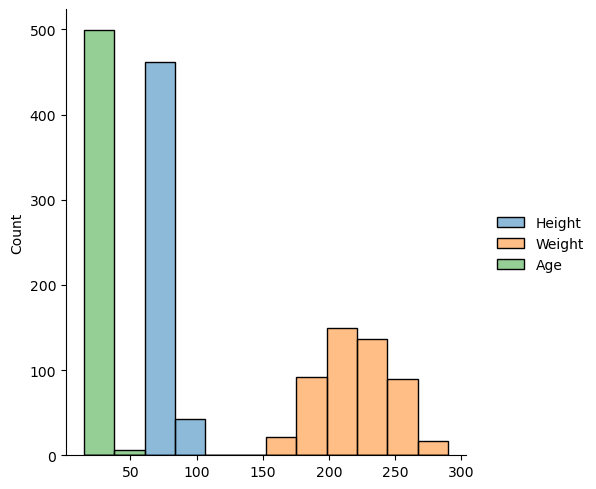

In [17]:
#Q5.2
df = pd.read_csv('population-1.csv')
sns.displot(df)
plt.show()

In [61]:
#Q5.3
print(df["Weight"].mean())
print(df["Weight"].std())

220.67326732673268
26.643110470317723


In [20]:
#Q5.4
w = df['Weight']
sample = np.random.choice(w, size=30)

print(np.mean(sample))


print(np.mean(sample) - df["Weight"].mean())

np.random.seed(42)


219.63333333333333
-1.0399339933993588


In [ ]:
#Q5.5
sample_means = [data["Weight"].sample(30).mean() for i in range(1000)]
sample_means = pd.Series(sample_means)

sample_mean = sample_means.mean()
sample_std = sample_means.std()




References:
https://www.w3schools.com/python/numpy/numpy_random_seaborn.asp
https://seaborn.pydata.org/tutorial/distributions.html
https://www.geeksforgeeks.org/numpy-percentile-in-python/
https://www.youtube.com/watch?v=KFuEAGR3HS4
https://www.featureranking.com/tutorials/statistics-tutorials/normal-distribution/
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.iqr.html
https://sphweb.bumc.bu.edu/otlt/mph-modules/bs/bs704_confidence_intervals/bs704_confidence_intervals5.html
https://www.w3schools.com/python/module_statistics.asp
https://stackoverflow.com/questions/59662920/how-to-get-the-mode-of-distribution-in-scipy-stats
https://www.codecamp.ru/blog/confidence-intervals-python/



---

### Evaluation (Keep it!)

| Question | Mark     | Comment   
|:-------:|:--------:|:----------------------
| 1       |   30/30    |     
| 2       |   20/20 | 
| 3       |   10/10    |     
| 4       |   10/10 | 
| 5       |   30/30    |        
|**Total**|**100/100**  | 
